# Titanic Survival ML Prediction
### Hello, this is my very first competition with Titanic Survival Machine Learning Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Let's load our data :

In [2]:
train_data = pd.read_csv(r"C:\Users\coucous\Downloads\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv(r"C:\Users\coucous\Downloads\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Wrangling

Let's describe the data :

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We notice that the main differene between train dataset and test dataset is the column "Survived", besides the size of course.

In [6]:
train_data.shape

(891, 12)

In [7]:
test_data.shape

(418, 11)

check the missing values

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Before filling the missing values for : age, Cabin and Embarked, we need to check the distribution to decide whether we fill with : mean, median or mode.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

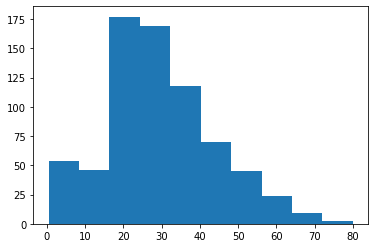

In [9]:
#draw histogram with count of raws for each age
plt.hist(train_data['Age'])

As we can see, the 'Age' values are not uniformly distributed, so we avoid using the mean for missing values. We choose 'median' instead.

In [10]:
gb_Cabin = train_data[['Cabin','PassengerId']].groupby(['Cabin']).count().sort_values("PassengerId", axis = 0, ascending = False)
gb_Cabin.T

Cabin,C23 C25 C27,G6,B96 B98,F2,C22 C26,E101,F33,D,C78,B57 B59 B63 B66,...,C111,C110,C106,C104,C103,C101,B94,B86,B82 B84,T
PassengerId,4,4,4,3,3,3,3,3,2,2,...,1,1,1,1,1,1,1,1,1,1


Here again, there is not a uniform distribution, and the frequency of a cabin value is always low (1 to 4) when the missing values are so frequent (687) : so we choose to fill the missing values with 'NAN'.

In [11]:
gb_Embarked = train_data[['Embarked','PassengerId']].groupby(['Embarked']).count().sort_values("PassengerId", axis = 0, ascending = False)
gb_Embarked.T

Embarked,S,C,Q
PassengerId,644,168,77


For 'Embarked' missing values, we choose to use the mode, which is based on the values with highest frequency.

In [12]:
df = train_data
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Cabin'].fillna('N/A', inplace = True)
df['Embarked'].fillna('S', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S


In [13]:
age_validation = train_data.query("Age % 1 != 0")
print("Number of anomalous age data points = ", len(age_validation))

Number of anomalous age data points =  25


In [14]:
def age_treatment(Age): # Creating a user-defined function for treating Age
    Age_mod = [] # Array declartion
    if Age < 1: 
        Age_mod = str(Age).split('.')[1] # Considering values after decimal poiint
        Age_mod = int(Age_mod) # Converting to int type
    else:
        Age_mod = int(Age) # Converting to int type
    return Age_mod

age_manipulated = [age_treatment(Age) for Age in df.Age] # Function call
age_manipulated

df_train = df # Cloning merged_data to avoid data tampering

df_train.insert(3, "Age_mod", age_manipulated) # Adding new column in data-set
df_train.head()

,PassengerId,Survived,Pclass,Age_mod,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,22,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S
1,2,1,1,38,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,26,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S
3,4,1,1,35,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,35,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S


In [15]:
age_validation = df_train.query("Age_mod % 1 != 0")
print("Number of anomalous age data points = ", len(age_validation))

Number of anomalous age data points =  0


In [16]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age_mod        0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
df_2 = test_data
df_2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

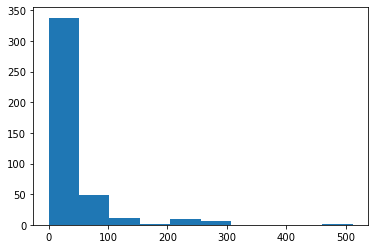

In [18]:
plt.hist(df_2['Fare'])

We replace the missing 'Fare' value with the most frequent value.

In [20]:
v = df_2.loc[df_2['Fare']>= 0]['Fare'].max()
df_2.loc[df_2['Fare'].isnull()] = v
df_2['Age'].fillna(df['Age'].median(), inplace = True)
df_2['Cabin'].fillna('N/A', inplace = True)
df_2['Embarked'].fillna('S', inplace = True)

In [22]:
def age_treatment2(Age): # Creating a user-defined function for treating Age
    Age_mod = [] # Array declartion
    if Age < 1: 
        Age_mod = str(Age).split('.')[1] # Considering values after decimal poiint
        Age_mod = int(Age_mod) # Converting to int type
    else:
        Age_mod = int(Age) # Converting to int type

    return Age_mod


age_manipulated2 = [age_treatment2(Age) for Age in df_2.Age] # Function call
age_manipulated2

df_test = df_2 # Cloning merged_data to avoid data tampering

df_test.insert(3, "Age_mod", age_manipulated2) # Adding new column in data-set
df_test.head()

,PassengerId,Pclass,Name,Age_mod,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3.0,"Kelly, Mr. James",34,male,34.5,0.0,0.0,330911,7.8292,N/A,Q
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",47,female,47.0,1.0,0.0,363272,7.0000,N/A,S
2,894.0,2.0,"Myles, Mr. Thomas Francis",62,male,62.0,0.0,0.0,240276,9.6875,N/A,Q
3,895.0,3.0,"Wirz, Mr. Albert",27,male,27.0,0.0,0.0,315154,8.6625,N/A,S
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,female,22.0,1.0,1.0,3101298,12.2875,N/A,S


In [24]:
age_validation = df_test.query("Age_mod % 1 != 0")
print("Number of anomalous age data points = ", len(age_validation))

Number of anomalous age data points =  0


In [25]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Age_mod        0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Done!

# EDA

Let's show some insights and relationship between features.

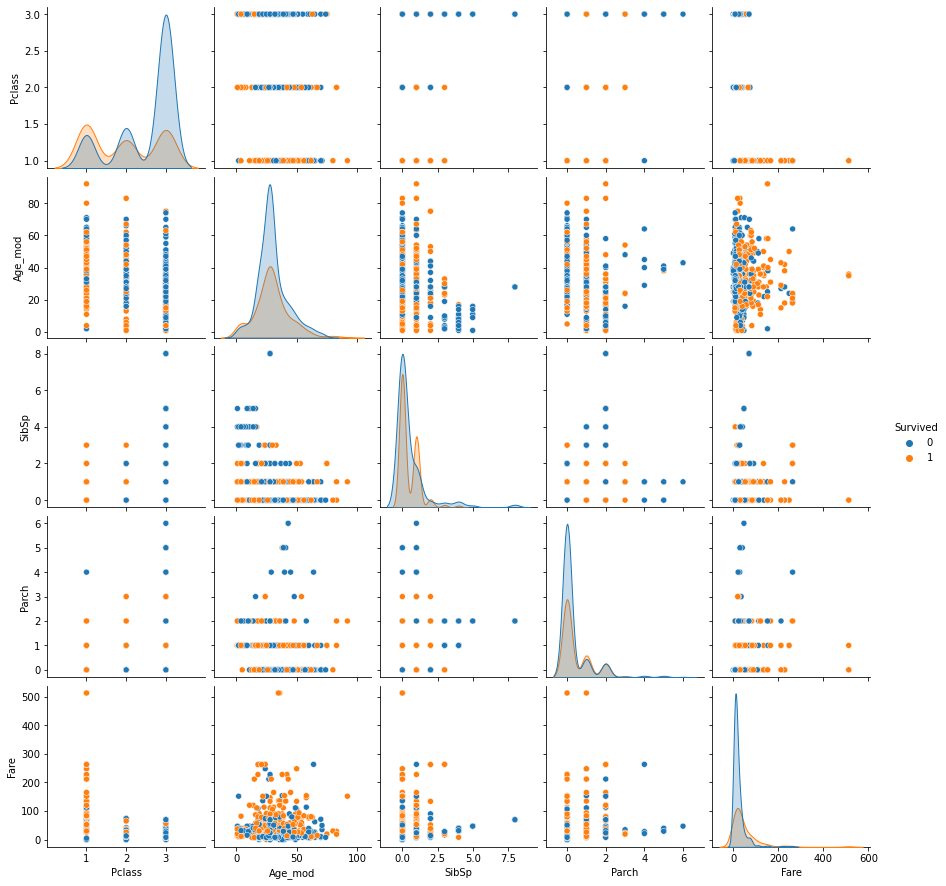

In [26]:
sns.color_palette("hls", 8)
df_filtered = df_train[['Pclass', 'Age_mod','SibSp','Parch','Fare','Survived']]
sns.pairplot(df_filtered, hue='Survived')

<AxesSubplot:xlabel='Pclass'>

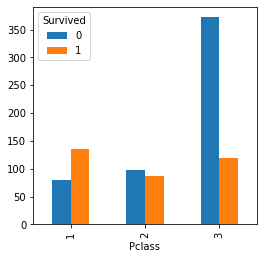

In [27]:
gb_Pclass = df_train.groupby(['Pclass','Survived']).size().unstack(level=1)
gb_Pclass.plot( kind = 'bar', figsize=(4, 4))
#df.plot(x='Pclass', y='Survived', kind = 'bar', figsize=(10, 10))

<AxesSubplot:xlabel='Sex'>

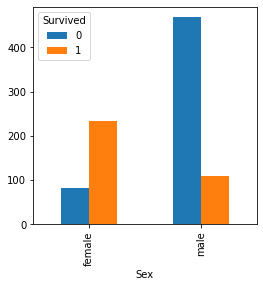

In [28]:
gb_Pclass = df_train.groupby(['Sex','Survived']).size().unstack(level=1)
gb_Pclass.plot( kind = 'bar', figsize=(4, 4))

In [29]:
df_train[['SibSp']].groupby(['SibSp']).count().T

SibSp,0,1,2,3,4,5,8


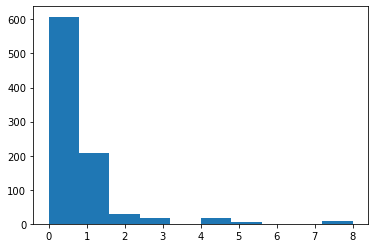

In [30]:
#show different SibSp distribution 
plt.hist(df_train[['SibSp']]);

Here, we can see that the most dominating number of Siblings-Spouses per passenger is 0, then 1, then 2 than 4 which means small families

<AxesSubplot:xlabel='SibSp'>

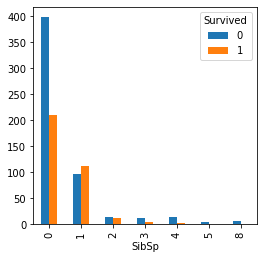

In [31]:
# Survival per SibSp class
gb_SibSp = df_train.groupby(['SibSp','Survived']).size().unstack(level=1)
gb_SibSp.plot( kind = 'bar',  figsize=(4, 4))


The highest survival rate is among average sized families (1, 2, 3 or 4 Siblings-Spouses).

In [32]:
df_train[['Parch']].groupby(['Parch']).count().T

Parch,0,1,2,3,4,5,6


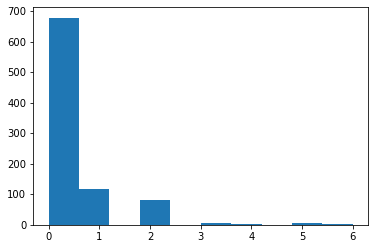

In [33]:
#show different Parent-child distribution 
plt.hist(df_train[['Parch']]);

<AxesSubplot:xlabel='Parch'>

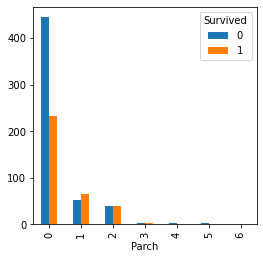

In [34]:
# Survival per Parent-Child class
gb_SibSp = df_train.groupby(['Parch','Survived']).size().unstack(level=1)
gb_SibSp.plot( kind = 'bar',  figsize=(4, 4))


Once again, average sized famillies have higher survival rate (1, 2 and 3 Parents & Children)

<AxesSubplot:xlabel='Embarked'>

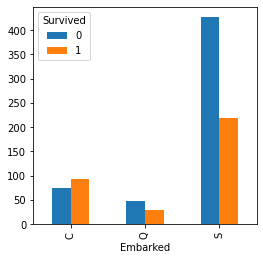

In [35]:
# Embarkment distribution
gb_Embarked = df_train.groupby(['Embarked','Survived']).size().unstack(level=1)
gb_Embarked.plot( kind = 'bar',  figsize=(4, 4))

The passengers who embarked from Charbourg had the highest survival rate than other Ports.

<AxesSubplot:xlabel='Age_mod'>

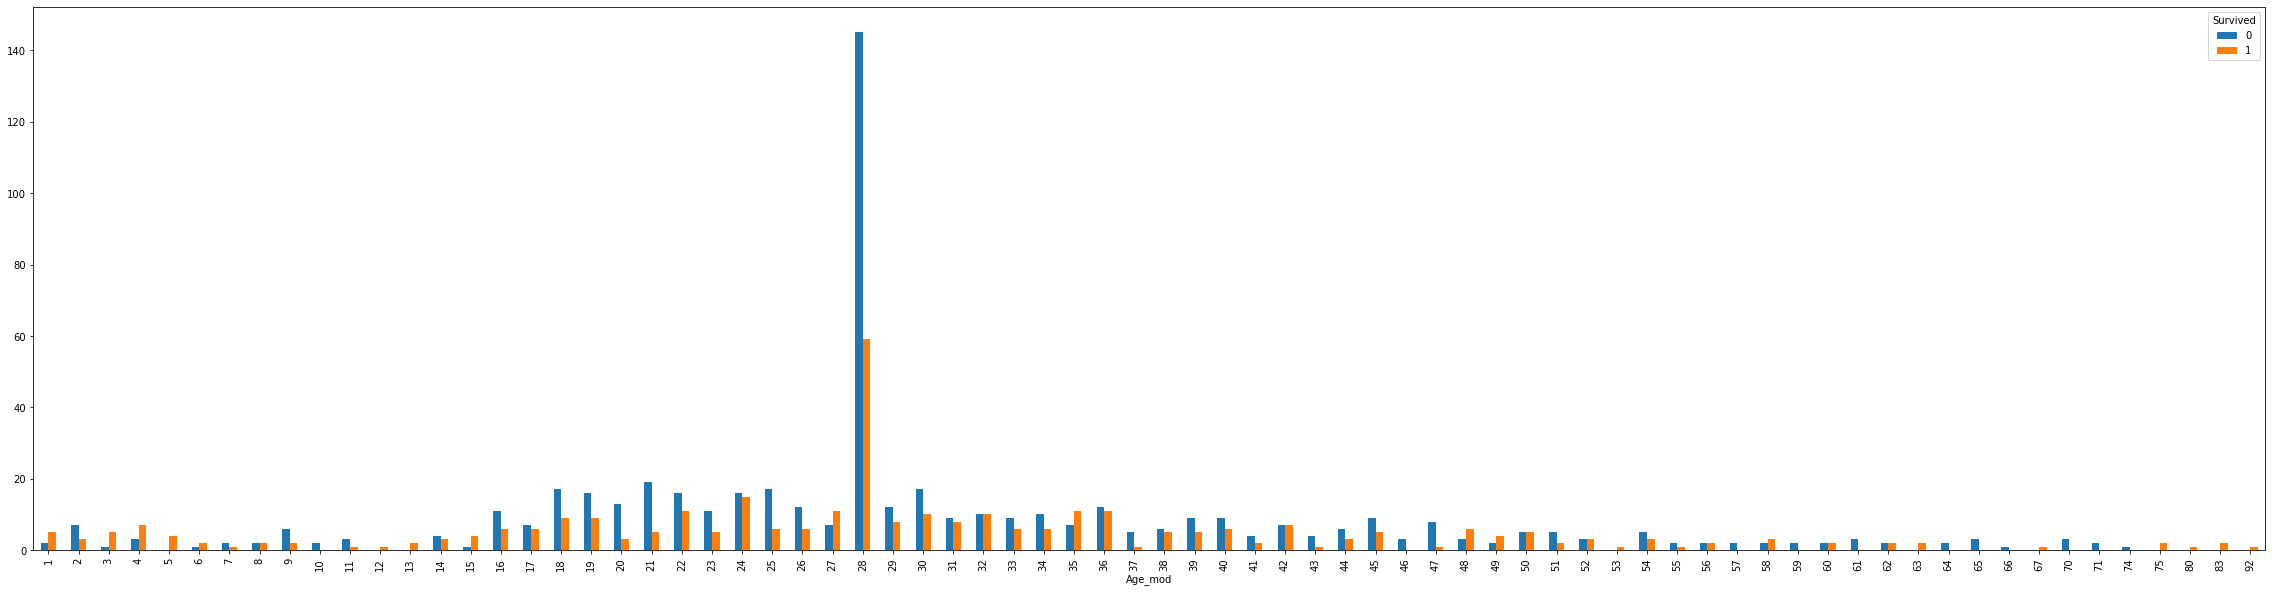

In [37]:
# Age distribution
gb_Age = df_train.groupby(['Age_mod','Survived']).size().unstack(level=1)
gb_Age.plot( kind = 'bar',  figsize=(40, 10))

(array([ 18.,  16.,  99., 237.,  62.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 [<matplotlib.patches.Polygon at 0x22e1c241580>])

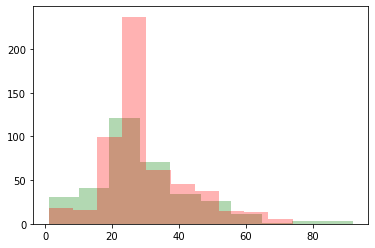

In [39]:
x_s =  df_train.loc[df_train.Survived == 1]["Age_mod"]
x_ns = df_train.loc[df_train.Survived == 0]["Age_mod"]

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=10)

plt.hist(x_s, **kwargs, color = 'green') #survived
plt.hist(x_ns, **kwargs, color = 'red' )  #did not survive


Passenger under 30 and over 70 have the highest survival rate.

(array([421.,  83.,  25.,   6.,   4.,   4.,   0.,   0.,   3.,   3.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 [<matplotlib.patches.Polygon at 0x22e1c87c520>])

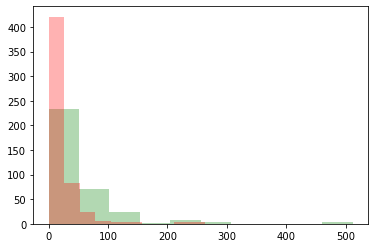

In [40]:
x_s =  df_train.loc[df_train.Survived == 1]["Fare"]
x_ns = df_train.loc[df_train.Survived == 0]["Fare"]


kwargs = dict(histtype='stepfilled', alpha=0.3, bins=10)

plt.hist(x_s, **kwargs, color = 'green') #survived
plt.hist(x_ns, **kwargs, color = 'red' )  #did not survive

The highest the fare, the highest the survival rate.

In [41]:
df_train.Cabin.value_counts()

N/A            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Most of passengers did not have a given Cabin identifier. So, the number of both Survivals and Victims is high among not given Cabin ID.

Let's check the ratio, maybe it gives more significant impact :

 Total survival :  342
 Total surv has cabin :  136
 Total surv no cabin :  206
 Total has cabin :  204
 Total surv. has cabin :  136
 Total not surv. has cabin :  68
 Total not surv. no cabin :  481


[Text(0.0, 0, 'Surv\n Given Cabin'),
 Text(1.0, 0, 'Not Surv\n Given Cabin'),
 Text(2.0, 0, 'Surv\n No Given Cabin'),
 Text(3.0, 0, 'Not Surv\n No Given Cabin')]

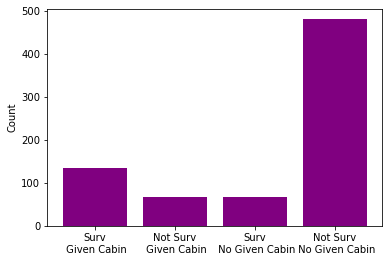

In [107]:
total_survival = df_train["Survived"].sum()
total_has_cabin = df_train.loc[(df_train.Cabin != "N/A") ]['Survived'].count()

total_survnocabin = df_train.loc[(df_train.Cabin == "N/A") ]['Survived'].sum()
total_surv_cabin = df_train.loc[(df_train.Cabin != "N/A") ]['Survived'].sum()
total_no_surv_cabin = total_has_cabin - total_surv_cabin

total_nosurvnocabin = (891 - total_has_cabin ) - df_train.loc[(df_train.Cabin == "N/A") ]['Survived'].sum()

print(" Total survival : ", total_survival)
print(" Total surv has cabin : ", Survived_has_Cabin)
print(" Total surv no cabin : ", Survived_no_Cabin)

print(" Total has cabin : ", total_has_cabin)
print(" Total surv. has cabin : ", total_surv_cabin)
print(" Total not surv. has cabin : ", total_no_surv_cabin)
print(" Total not surv. no cabin : ", total_nosurvnocabin)

labels = np.array(["Surv\n Given Cabin", "Not Surv\n Given Cabin", "Surv\n No Given Cabin", "Not Surv\n No Given Cabin"])
a = np.array([Survived_has_Cabin, total_no_surv_cabin , total_no_surv_cabin , total_nosurvnocabin])

ax= plt.subplot()
ax.bar(labels, a, color="purple")
ax.set_ylabel ('Count')
ax.set_xticks(labels)
ax.set_xticklabels(labels)


We focus on the rate of survival : Identified (given ID) Cabins have higher survival rate than non identified ones.

Now, we decide which features are relevant for prediction which will be led in the next section

PassengerId  &emsp;&emsp;  x    
Survived      &emsp; &emsp;  x   
Pclass     &emsp;  &emsp;  Yes   
Name      &emsp;&emsp;     x   
Sex       &emsp;&emsp;     Yes   
Age      &emsp; &emsp;     Yes   
SibSp    &emsp;&emsp;      Yes   
Parch     &emsp;&emsp;     Yes   
Ticket    &emsp; &emsp;    x   
Fare      &emsp; &emsp;    Yes    
Cabin     &emsp; &emsp;    Yes   
Embarked   &emsp;&emsp;    Yes   

Now, get dummies from categorical valiables : Sex, Cabin (given, not_given), Embarked :

In [108]:
data = df_train.loc[:, ['Survived','Pclass','Sex','Age_mod','SibSp','Parch','Fare','Cabin','Embarked']]
data['Cabin'].loc[df_train.Cabin!='N/A']= 1
data['Cabin'].loc[df_train.Cabin=='N/A']= 0
data['Sex'].loc[df_train.Sex!='female'] = 0
data['Sex'].loc[df_train.Sex=='female'] = 1
data['Embarked'].loc[df_train.Embarked=='C'] = 0
data['Embarked'].loc[df_train.Embarked=='Q'] = 1
data['Embarked'].loc[df_train.Embarked=='S'] = 2
data
#data = pd.get_dummies(data[['Sex','Embarked']])

C:\Users\coucous\AppData\Local\Temp\ipykernel_4812\3205311041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'].loc[df_train.Cabin!='N/A']= 1
C:\Users\coucous\AppData\Local\Temp\ipykernel_4812\3205311041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'].loc[df_train.Cabin=='N/A']= 0
C:\Users\coucous\AppData\Local\Temp\ipykernel_4812\3205311041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex

,Survived,Pclass,Sex,Age_mod,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7.2500,0,2
1,1,1,1,38,1,0,71.2833,1,0
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,1,2
4,0,3,0,35,0,0,8.0500,0,2
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0,2
887,1,1,1,19,0,0,30.0000,1,2
888,0,3,1,28,1,2,23.4500,0,2
889,1,1,0,26,0,0,30.0000,1,0


In [109]:
testset = df_test.loc[:, ['Pclass','Sex','Age_mod','SibSp','Parch','Fare','Cabin','Embarked']]
testset['Cabin'].loc[df_test.Cabin!='N/A']= 1
testset['Cabin'].loc[df_test.Cabin=='N/A']= 0
testset['Sex'].loc[df_test.Sex!='female'] = 0
testset['Sex'].loc[df_test.Sex=='female'] = 1
testset['Embarked'].loc[df_test.Embarked=='C'] = 0
testset['Embarked'].loc[df_test.Embarked=='Q'] = 1
testset['Embarked'].loc[df_test.Embarked=='S'] = 2
testset

C:\Users\coucous\AppData\Local\Temp\ipykernel_4812\782434493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset['Cabin'].loc[df_test.Cabin!='N/A']= 1
C:\Users\coucous\AppData\Local\Temp\ipykernel_4812\782434493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset['Cabin'].loc[df_test.Cabin=='N/A']= 0
C:\Users\coucous\AppData\Local\Temp\ipykernel_4812\782434493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset[

,Pclass,Sex,Age_mod,SibSp,Parch,Fare,Cabin,Embarked
0,3.0,0,34,0.0,0.0,7.8292,0,1
1,3.0,1,47,1.0,0.0,7.0000,0,2
2,2.0,0,62,0.0,0.0,9.6875,0,1
3,3.0,0,27,0.0,0.0,8.6625,0,2
4,3.0,1,22,1.0,1.0,12.2875,0,2
...,...,...,...,...,...,...,...,...
413,3.0,0,28,0.0,0.0,8.0500,0,2
414,1.0,1,39,0.0,0.0,108.9000,1,0
415,3.0,0,38,0.0,0.0,7.2500,0,2
416,3.0,0,28,0.0,0.0,8.0500,0,2


# Prediction

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC #SVM classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [111]:
#Preprocessing
from sklearn import preprocessing
transform = preprocessing.StandardScaler()
X= data[['Pclass','Sex','Age_mod','SibSp','Parch','Fare','Cabin','Embarked']]
X = transform.fit(X).transform(X)
X

array([[ 0.82737724, -0.73769513, -0.59115981, ..., -0.50244517,
        -0.54492498,  0.58595414],
       [-1.56610693,  1.35557354,  0.60220953, ...,  0.78684529,
         1.835115  , -1.9423032 ],
       [ 0.82737724,  1.35557354, -0.29281748, ..., -0.48885426,
        -0.54492498,  0.58595414],
       ...,
       [ 0.82737724,  1.35557354, -0.14364631, ..., -0.17626324,
        -0.54492498,  0.58595414],
       [-1.56610693, -0.73769513, -0.29281748, ..., -0.04438104,
         1.835115  , -1.9423032 ],
       [ 0.82737724, -0.73769513,  0.15469603, ..., -0.49237783,
        -0.54492498, -0.67817453]])

In [123]:
Y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state=4)

In [124]:
y_test.shape

(179,)

In [125]:
#Logistic Regression Model
#lr = LogisticRegression()
#parameters = {'C':[0.02,0.1, 1], 'penalty': ['l2'], 'Solver':['lbfgs']}
#lr = GridSearchCV (lr, parameters).fit(x_train, y_train)
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0]


In [126]:
from sklearn.metrics import r2_score
#r2_score (y_test, y_pred)

s=lr.score(x_test,y_test)
s

0.8379888268156425

In [127]:
#confusion matrix :
def plot_conf_matrix (y, y_predict) :
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot= True, ax=ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')


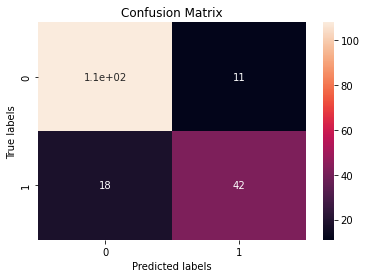

In [128]:
yhat = lr.predict(x_test)
plot_conf_matrix(y_test,yhat)

In [129]:
#SVM
#parameters = {'kernel': ('linear','rbf','poly','rbf','sigmoid'), 'C': np.logspace(-3,3,5)}
#svm = SVC()
svm = SVC()
#svm_cv = GridSearchCV(svm, parameters).fit(x_train,y_train)
#svm_score = svm_cv.score(x_test,y_test)
svm.fit(x_train,y_train)
s=svm.score(x_test,y_test)
y_pred = svm.predict(x_test)
#s=r2_score (y_test, y_pred)
s

0.8491620111731844

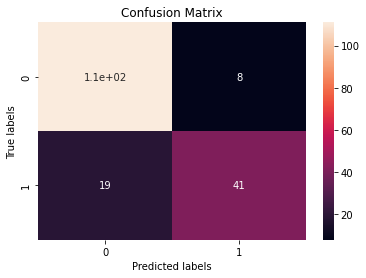

In [130]:
yhat = svm.predict(x_test)
plot_conf_matrix(y_test,yhat)

In [132]:
#D-Tree
parameters = {'criterion': ['gini','entropy'], 'splitter':['best','random'],'max_depth': [2*n for n in range (1,10)], 'max_samples_leaf':[1,2,4], 'min_sample_split':[2,5,10]}
tree = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 6)
tree.fit(x_train,y_train)
s =tree.score(x_test, y_test)
y_pred = svm.predict(x_test)
#s=r2_score (y_test, y_pred)
s

0.8100558659217877

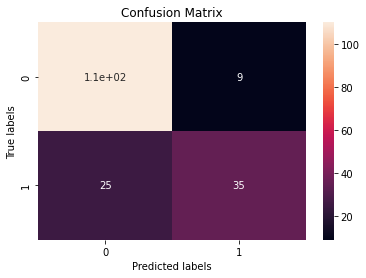

In [133]:
yhat = tree.predict(x_test)
plot_conf_matrix(y_test,yhat)

In [134]:
#KNN 
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
s =KNN.score(x_test,y_test)
y_pred = svm.predict(x_test)
#s=r2_score (y_test, y_pred)
s

0.8156424581005587

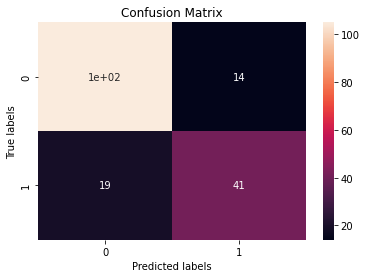

In [135]:
yhat = KNN.predict(x_test)
plot_conf_matrix(y_test,yhat)

In [136]:
#XgBoost
import xgboost as xgb
gbm = xgb.XGBClassifier()
gbm.fit(x_train, y_train)
s= gbm.score(x_test,y_test)
#s=r2_score (y_test, y_pred)
s

C:\Users\coucous\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:11:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8491620111731844

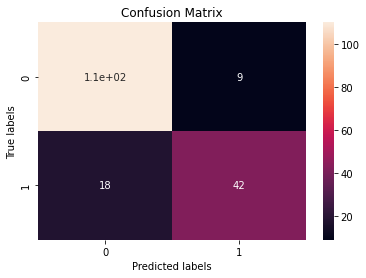

In [137]:
yhat = gbm.predict(x_test)
plot_conf_matrix(y_test,yhat)

The best classifier for now, is the Xgboost model.

In [138]:
#predict for df_test
transform = preprocessing.StandardScaler()
X2= testset[['Pclass','Sex','Age_mod','SibSp','Parch','Fare','Cabin','Embarked']]
X2 = transform.fit(X2).transform(X2)
predicted = lr.predict(X2)
predicted

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [139]:
#save the model
import pickle
s= pickle.dumps(predicted)

import csv
PassengerId = 891
with open('predicted.csv','w',newline='') as csvfile:
    fieldnames = ['PassengerId','Survived']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    for p in predicted:
        PassengerId +=1
        thewriter.writerow({'PassengerId':PassengerId, 'Survived':p })
        
    